# Business Problem 
It is important to understand our main objective which is to develop a model that can assess the sentiment of tweets solely based on their content. To address this, we’re using a dataset from CrowdFlower, which includes more than 9,000 tweets about Apple and Google products. These tweets have been labeled by human raters as positive, negative, or neutral, providing a foundation for a Natural Language Processing (NLP) approach to classify sentiment accurately.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, cohen_kappa_score, matthews_corrcoef
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef
import ast

In [2]:
df = pd.read_csv('clean_df.csv')
df.head()

,Original Tweet,Product,Emotion,Brand,Clean Tweet,Character Count of Original Tweet,Hashtag,Hashtag Count,Character Count of Clean Tweet,Clean Tokens,Clean Token Count
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,i have a g iphone after hrs tweeting at risea...,127,"['#RISE_Austin', '#SXSW']",2,127,"['i', 'have', 'g', 'iphone', 'after', 'hrs', '...",16
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,know about awesome ipadiphone app that youll ...,139,['#SXSW'],1,139,"['know', 'about', 'awesome', 'ipadiphone', 'ap...",15
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,can not wait for ipad also they should sale t...,79,"['#iPad', '#SXSW']",2,79,"['can', 'not', 'wait', 'ipad', 'also', 'they',...",11
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,i hope this years festival isnt as crashy as ...,82,['#sxsw'],1,82,"['i', 'hope', 'years', 'festival', 'isnt', 'as...",12
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,great stuff on fri sxsw marissa mayer google ...,131,['#SXSW'],1,131,"['great', 'stuff', 'fri', 'sxsw', 'marissa', '...",14


In [3]:
data = df[['Clean Tokens', 'Emotion']]
data.head()

,Clean Tokens,Emotion
0,"['i', 'have', 'g', 'iphone', 'after', 'hrs', '...",Negative
1,"['know', 'about', 'awesome', 'ipadiphone', 'ap...",Positive
2,"['can', 'not', 'wait', 'ipad', 'also', 'they',...",Positive
3,"['i', 'hope', 'years', 'festival', 'isnt', 'as...",Negative
4,"['great', 'stuff', 'fri', 'sxsw', 'marissa', '...",Positive


## Train Test Split

In [4]:
X = data['Clean Tokens']
y = data['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 43, stratify = data['Emotion'])

display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(6802,)

(6802,)

(2268,)

(2268,)

We will build 6 models which are:
* Logistic Regression with Count Vectorizer
* Logistic Regression with TF-IDF Vectorizer
* K Nearest Neighbors with Count Vectorizer
* K Nearest Neighbors with TF-IDF Vectorizer
* Multinomial Naive Bayes with Count Vectorizer
* Multinomial Naive Bayes with TF-IDF Vectorizer

## 1- Logistic Regression with Count Vectorizer

In [5]:
def passing(doc):
    return doc

label_encod = LabelEncoder()
y_train_enc = label_encod.fit_transform(y_train)
y_test_enc = label_encod.transform(y_test)

LRpipelineCV = Pipeline([
    ('BOW', CountVectorizer(preprocessor = passing, tokenizer = passing)), 
    ('Classifier', LogisticRegression()), 
])

LRpipelineCV.fit(X_train, y_train_enc)

Pipeline(steps=[('BOW',
                 CountVectorizer(preprocessor=<function passing at 0x16beffce0>,
                                 tokenizer=<function passing at 0x16beffce0>)),
                ('Classifier', LogisticRegression())])

              precision    recall  f1-score   support

    Negative       1.00      0.00      0.00       427
     Neutral       0.62      0.94      0.75      4148
    Positive       0.43      0.11      0.17      2227

    accuracy                           0.61      6802
   macro avg       0.69      0.35      0.31      6802
weighted avg       0.58      0.61      0.51      6802



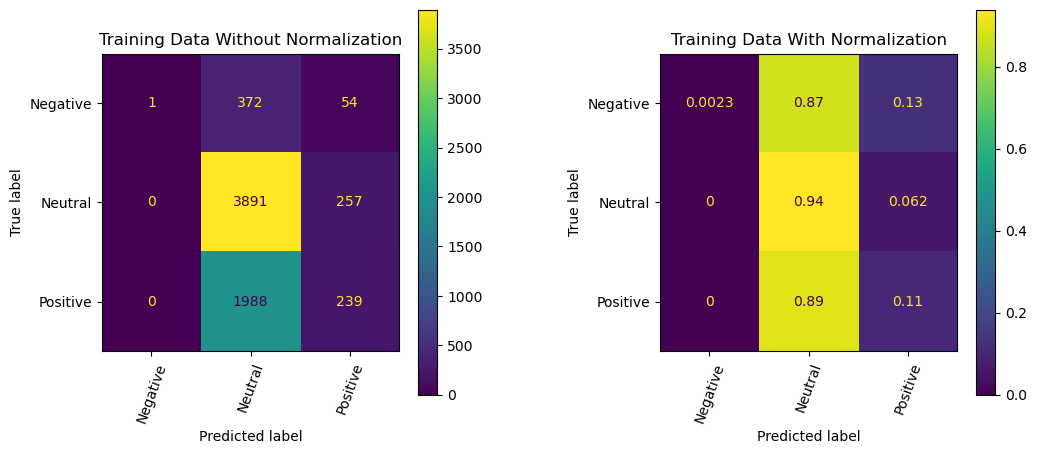

Cohen's Kappa for Training:
0.049
Matthew's Correlation Coefficient for Training:
0.074


In [6]:
def show_confusion_and_report(estimator, X, y, class_labels, dataset_name):
    pred = estimator.predict(X)

    print(classification_report(y, pred, target_names=class_labels))
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    
    ConfusionMatrixDisplay.from_estimator(
        estimator, X, y, display_labels=class_labels, cmap=plt.cm.viridis, 
        xticks_rotation=70, ax=ax[0], values_format='d'
    )
    ax[0].set_title(f'{dataset_name} Data Without Normalization')
    
    ConfusionMatrixDisplay.from_estimator(
        estimator, X, y, display_labels=class_labels, cmap=plt.cm.viridis, 
        xticks_rotation=70, ax=ax[1], normalize='true'
    )
    ax[1].set_title(f'{dataset_name} Data With Normalization')
    
    plt.subplots_adjust(wspace=0.5)
    plt.show()

    print(f"Cohen's Kappa for {dataset_name}:") 
    print(round(cohen_kappa_score(y, pred), 3))
    
    print(f"Matthew's Correlation Coefficient for {dataset_name}:") 
    print(round(matthews_corrcoef(y, pred), 3)) 

show_confusion_and_report(LRpipelineCV, X_train, y_train_enc, label_encod.classes_, 'Training')

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       142
     Neutral       0.62      0.93      0.74      1383
    Positive       0.42      0.11      0.18       743

    accuracy                           0.60      2268
   macro avg       0.35      0.35      0.31      2268
weighted avg       0.52      0.60      0.51      2268



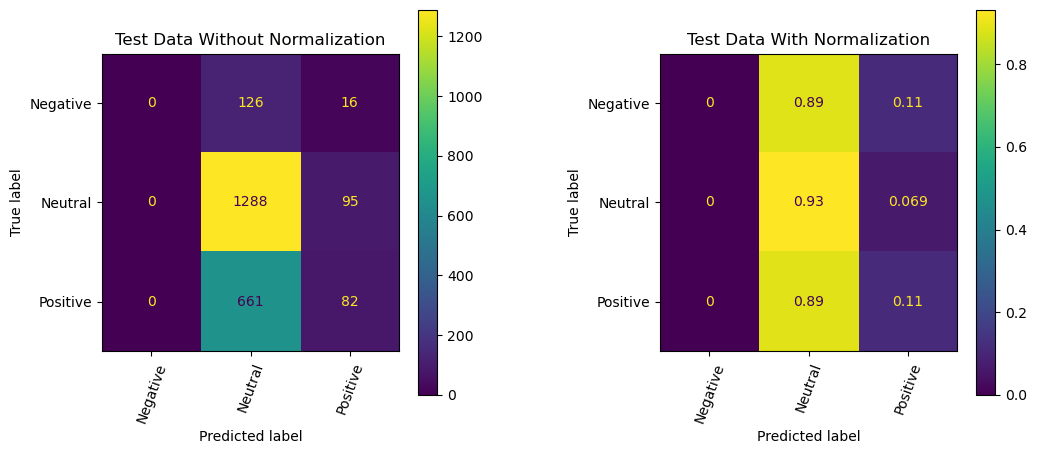

Cohen's Kappa for Test:
0.044
Matthew's Correlation Coefficient for Test:
0.064


In [7]:
show_confusion_and_report(LRpipelineCV, X_test, y_test_enc, label_encod.classes_, 'Test')

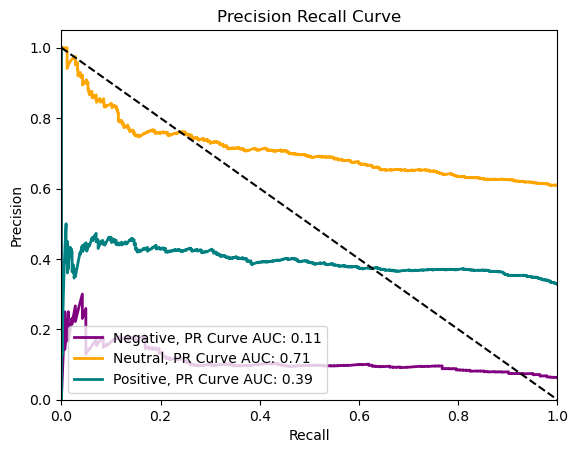

In [8]:
def trace_pr_curves(y_test_multi, y_hat_test_multi, classes):
    precision_dict = dict()
    recall_dict = dict()
    pr_final = dict()
    
    for i in range(3):
        precision_dict[i], recall_dict[i], _ = precision_recall_curve(y_test_multi[:, i], y_hat_test_multi[:, i])
        pr_final[i] = auc(recall_dict[i], precision_dict[i])
    
    plt.figure
    line_width = 2
    palette = ['purple', 'orange', 'teal']
    
    for i, class_new in enumerate(classes):
        plt.plot(recall_dict[i], precision_dict[i], color=palette[i], lw=line_width, 
                 label = f'{classes[i]}, PR Curve AUC: {round(pr_final[i], 2)}')
        
    plt.plot([0, 1], [1, 0], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="lower left")
    plt.show()
        
label = LabelBinarizer()
label.fit(y_test_enc)
y_test_multi = label.transform(y_test_enc)
y_hat_test_multi = LRpipelineCV.predict_proba(X_test)

trace_pr_curves(y_test_multi, y_hat_test_multi, label_encod.classes_)

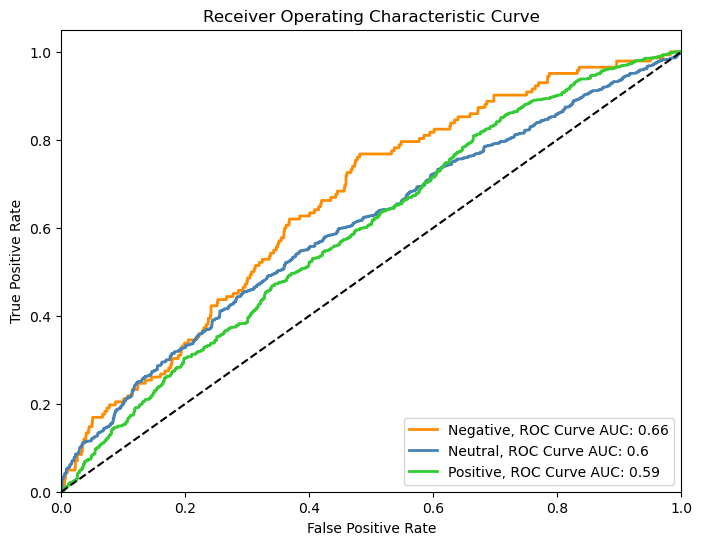

In [9]:
def tracer_roc_curves(y_test_multi, y_hat_test_multi, classes):
    faux_pos_rate = dict()
    vrai_pos_rate = dict()
    auc_roc = dict()
    
    for i in range(3):
        faux_pos_rate[i], vrai_pos_rate[i], _ = roc_curve(y_test_multi[:, i], y_hat_test_multi[:, i])
        auc_roc[i] = auc(faux_pos_rate[i], vrai_pos_rate[i])
    
    plt.figure(figsize=(8, 6))
    epaisseur = 2
    palette_couleurs = ['darkorange', 'steelblue', 'limegreen']
    
    for i, class_final in enumerate(classes):
        plt.plot(faux_pos_rate[i], vrai_pos_rate[i], color=palette_couleurs[i], lw=epaisseur, 
                 label = f'{classes[i]}, ROC Curve AUC: {round(auc_roc[i], 2)}') #setting plot with label
        
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()
        
tracer_roc_curves(y_test_multi, y_hat_test_multi, label_encod.classes_)

## 2- Logistic Regression with TF-IDF Vectorizer

In [10]:
y_train_enc = label_encod.fit_transform(y_train)
y_test_enc = label_encod.transform(y_test)

LRpipelineTF = Pipeline([
    ('BOW', TfidfVectorizer(preprocessor = passing, tokenizer = passing)), 
    ('Classifier', LogisticRegression()), 
])

LRpipelineTF.fit(X_train, y_train_enc)

Pipeline(steps=[('BOW',
                 TfidfVectorizer(preprocessor=<function passing at 0x16beffce0>,
                                 tokenizer=<function passing at 0x16beffce0>)),
                ('Classifier', LogisticRegression())])

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       427
     Neutral       0.62      0.98      0.76      4148
    Positive       0.48      0.05      0.09      2227

    accuracy                           0.61      6802
   macro avg       0.36      0.34      0.28      6802
weighted avg       0.53      0.61      0.49      6802



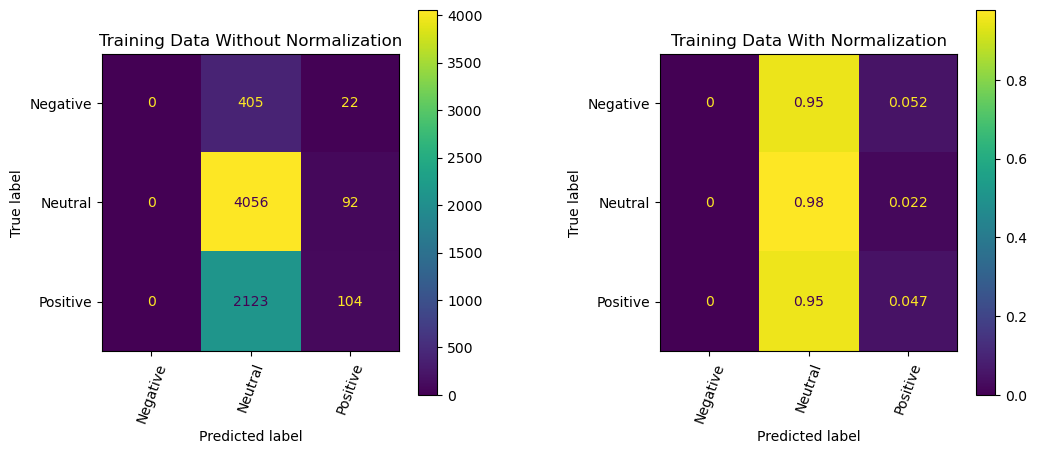

Cohen's Kappa for Training:
0.027
Matthew's Correlation Coefficient for Training:
0.06


In [11]:
show_confusion_and_report(LRpipelineTF, X_train, y_train_enc, label_encod.classes_, 'Training')

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       142
     Neutral       0.61      0.97      0.75      1383
    Positive       0.43      0.04      0.07       743

    accuracy                           0.61      2268
   macro avg       0.35      0.34      0.27      2268
weighted avg       0.51      0.61      0.48      2268



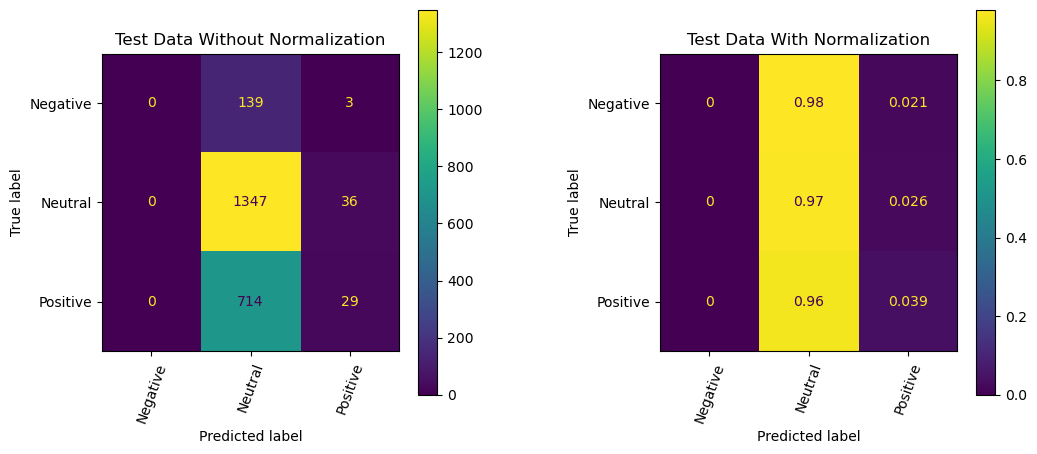

Cohen's Kappa for Test:
0.013
Matthew's Correlation Coefficient for Test:
0.031


In [12]:
show_confusion_and_report(LRpipelineTF, X_test, y_test_enc, label_encod.classes_, 'Test')

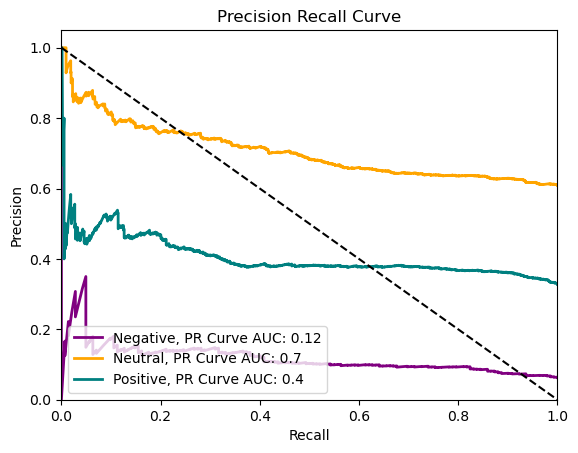

In [13]:
label.fit(y_test_enc)
y_test_multi = label.transform(y_test_enc) 
y_hat_test_multi = LRpipelineTF.predict_proba(X_test) 

trace_pr_curves(y_test_multi, y_hat_test_multi, label_encod.classes_)

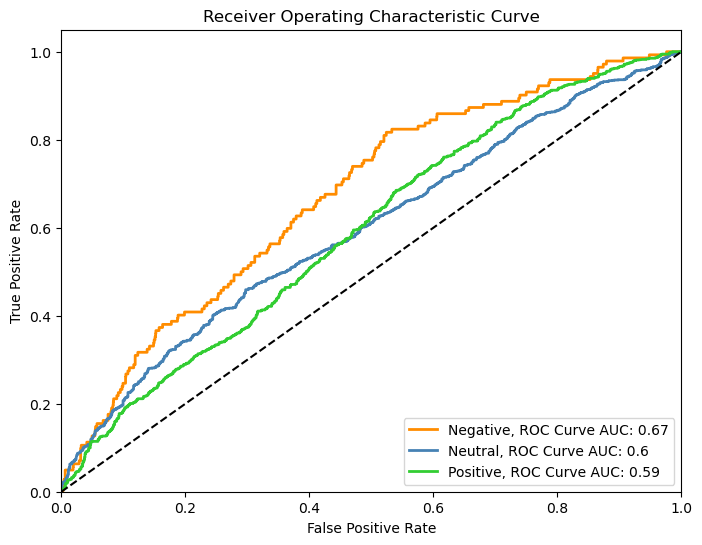

In [14]:
tracer_roc_curves(y_test_multi, y_hat_test_multi, label_encod.classes_)

## 3- K Nearest Neighbors with Count Vectorizer

In [15]:
y_train_enc = label_encod.fit_transform(y_train) 
y_test_enc = label_encod.transform(y_test) 

KNNpipelineCV = Pipeline([
    ('BOW', CountVectorizer(preprocessor = passing, tokenizer = passing)), 
    ('Classifier', KNeighborsClassifier()), 
])

KNNpipelineCV.fit(X_train, y_train_enc)

Pipeline(steps=[('BOW',
                 CountVectorizer(preprocessor=<function passing at 0x16beffce0>,
                                 tokenizer=<function passing at 0x16beffce0>)),
                ('Classifier', KNeighborsClassifier())])

              precision    recall  f1-score   support

    Negative       0.46      0.30      0.36       427
     Neutral       0.74      0.87      0.80      4148
    Positive       0.70      0.52      0.59      2227

    accuracy                           0.72      6802
   macro avg       0.63      0.56      0.59      6802
weighted avg       0.71      0.72      0.71      6802



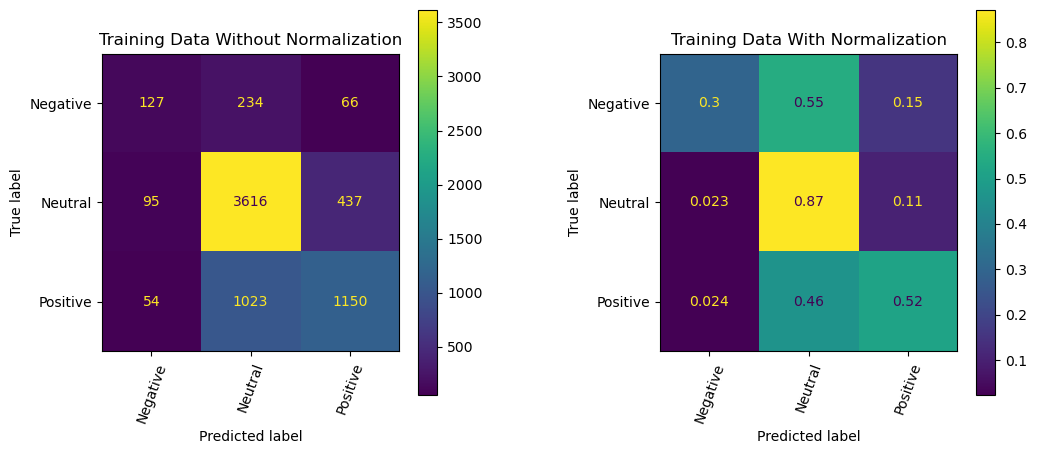

Cohen's Kappa for Training:
0.417
Matthew's Correlation Coefficient for Training:
0.427


In [16]:
show_confusion_and_report(KNNpipelineCV, X_train, y_train_enc, label_encod.classes_, 'Training')

              precision    recall  f1-score   support

    Negative       0.15      0.08      0.10       142
     Neutral       0.64      0.76      0.70      1383
    Positive       0.40      0.31      0.35       743

    accuracy                           0.57      2268
   macro avg       0.40      0.38      0.38      2268
weighted avg       0.53      0.57      0.55      2268



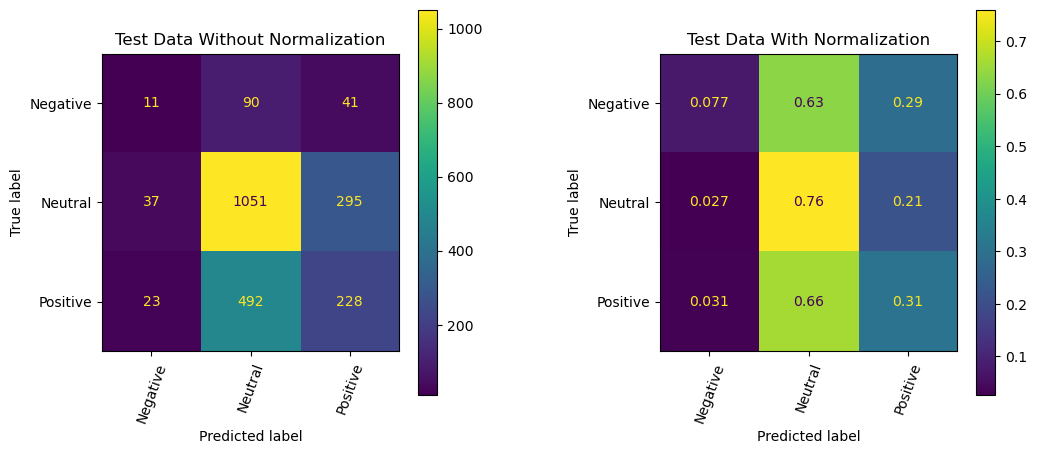

Cohen's Kappa for Test:
0.097
Matthew's Correlation Coefficient for Test:
0.1


In [17]:
show_confusion_and_report(KNNpipelineCV, X_test, y_test_enc, label_encod.classes_, 'Test')

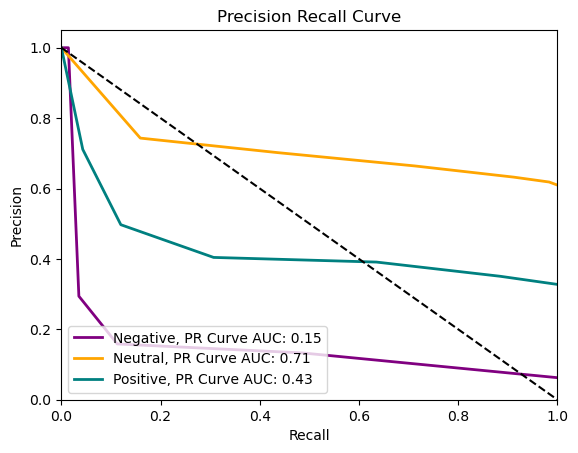

In [18]:
label.fit(y_test_enc)
y_test_multi = label.transform(y_test_enc)
y_hat_test_multi = KNNpipelineCV.predict_proba(X_test)

trace_pr_curves(y_test_multi, y_hat_test_multi, label_encod.classes_)

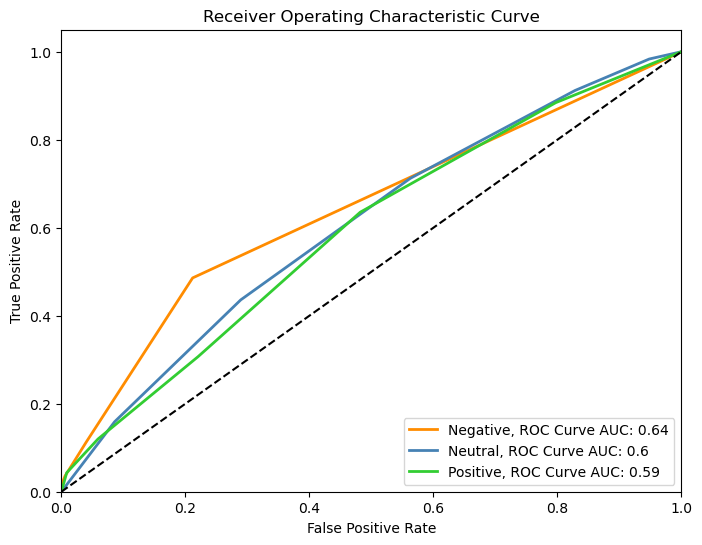

In [19]:
tracer_roc_curves(y_test_multi, y_hat_test_multi, label_encod.classes_)

## 4- K Nearest Neighbors with TF-IDF Vectorizer

In [20]:
y_train_enc = label_encod.fit_transform(y_train)
y_test_enc = label_encod.transform(y_test)

KNNpipelineTF = Pipeline([
    ('BOW', TfidfVectorizer(preprocessor = passing, tokenizer = passing)), 
    ('Classifier', KNeighborsClassifier()), 
])

KNNpipelineTF.fit(X_train, y_train_enc)

Pipeline(steps=[('BOW',
                 TfidfVectorizer(preprocessor=<function passing at 0x16beffce0>,
                                 tokenizer=<function passing at 0x16beffce0>)),
                ('Classifier', KNeighborsClassifier())])

              precision    recall  f1-score   support

    Negative       0.52      0.34      0.41       427
     Neutral       0.75      0.86      0.80      4148
    Positive       0.68      0.54      0.60      2227

    accuracy                           0.72      6802
   macro avg       0.65      0.58      0.61      6802
weighted avg       0.71      0.72      0.71      6802



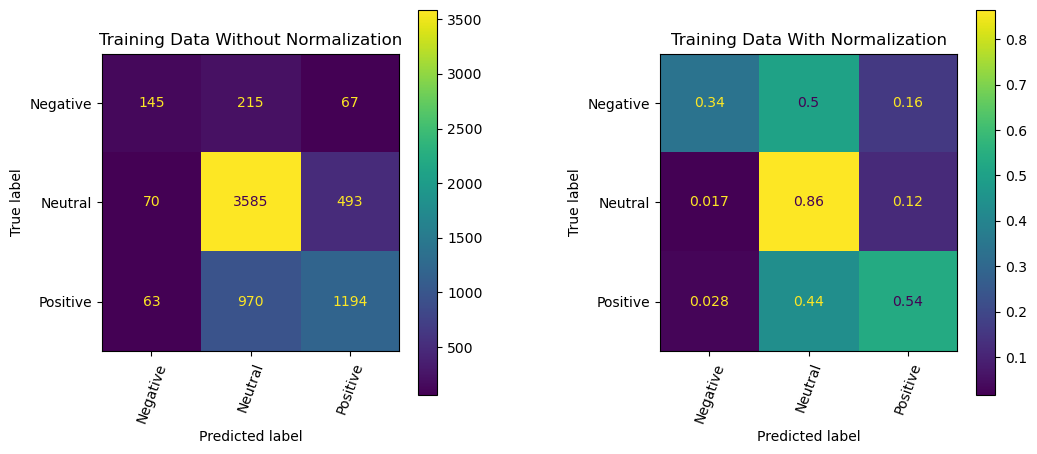

Cohen's Kappa for Training:
0.431
Matthew's Correlation Coefficient for Training:
0.439


In [21]:
show_confusion_and_report(KNNpipelineTF, X_train, y_train_enc, label_encod.classes_, 'Training')

              precision    recall  f1-score   support

    Negative       0.27      0.19      0.22       142
     Neutral       0.65      0.75      0.69      1383
    Positive       0.40      0.31      0.35       743

    accuracy                           0.57      2268
   macro avg       0.44      0.42      0.42      2268
weighted avg       0.54      0.57      0.55      2268



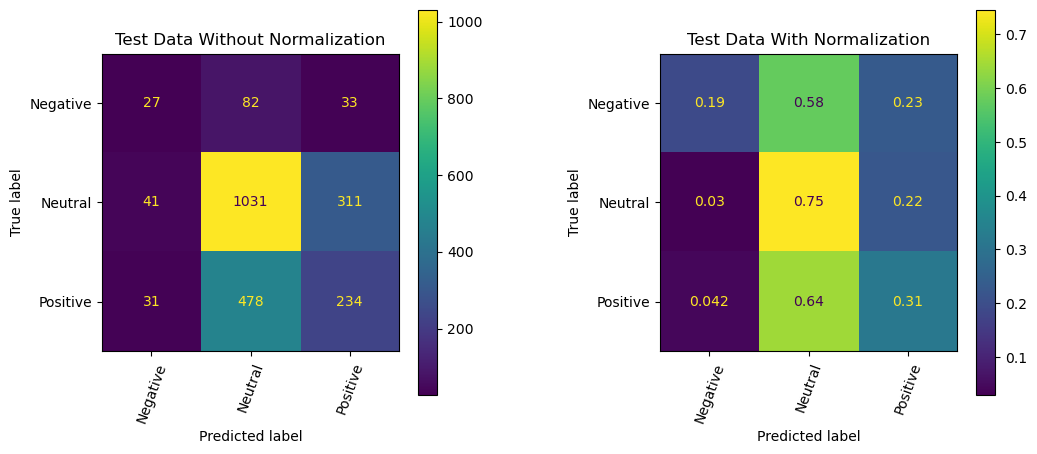

Cohen's Kappa for Test:
0.115
Matthew's Correlation Coefficient for Test:
0.117


In [22]:
show_confusion_and_report(KNNpipelineTF, X_test, y_test_enc, label_encod.classes_, 'Test')

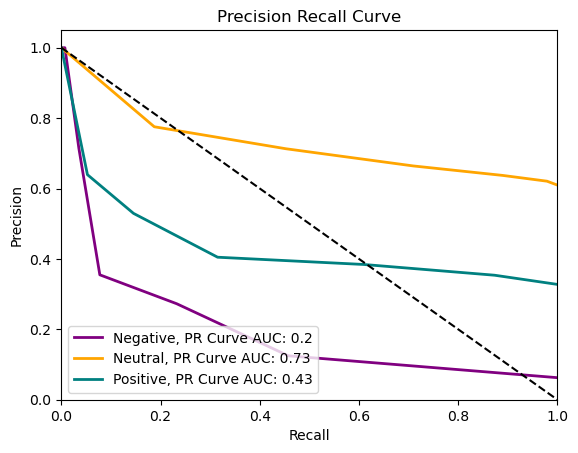

In [23]:
label.fit(y_test_enc)
y_test_multi = label.transform(y_test_enc) 
y_hat_test_multi = KNNpipelineTF.predict_proba(X_test) 

trace_pr_curves(y_test_multi, y_hat_test_multi, label_encod.classes_)

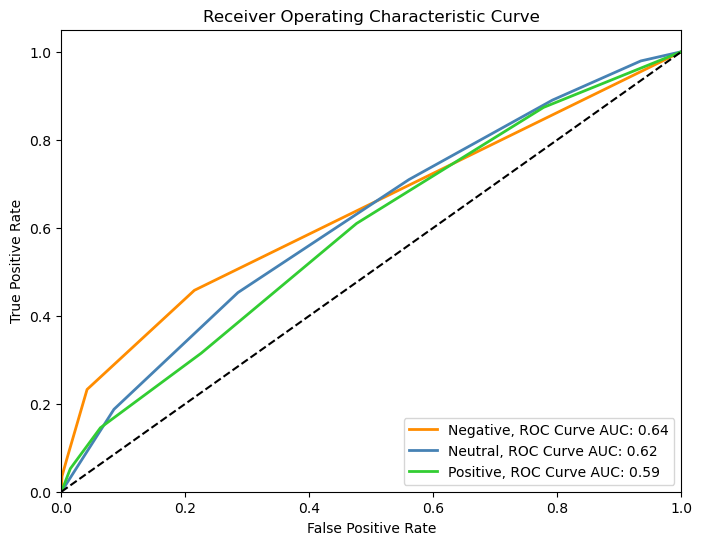

In [24]:
tracer_roc_curves(y_test_multi, y_hat_test_multi, label_encod.classes_)

## 5- Multinomial Naive Bayes with Count Vectorizer

In [25]:
y_train_enc = label_encod.fit_transform(y_train)
y_test_enc = label_encod.transform(y_test)
MNBpipelineCV = Pipeline([
    ('BOW', CountVectorizer(preprocessor = passing, tokenizer = passing)), 
    ('Classifier', MultinomialNB()), 
])
MNBpipelineCV.fit(X_train, y_train_enc)

Pipeline(steps=[('BOW',
                 CountVectorizer(preprocessor=<function passing at 0x16beffce0>,
                                 tokenizer=<function passing at 0x16beffce0>)),
                ('Classifier', MultinomialNB())])

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       427
     Neutral       0.63      0.89      0.73      4148
    Positive       0.43      0.18      0.25      2227

    accuracy                           0.60      6802
   macro avg       0.35      0.35      0.33      6802
weighted avg       0.52      0.60      0.53      6802



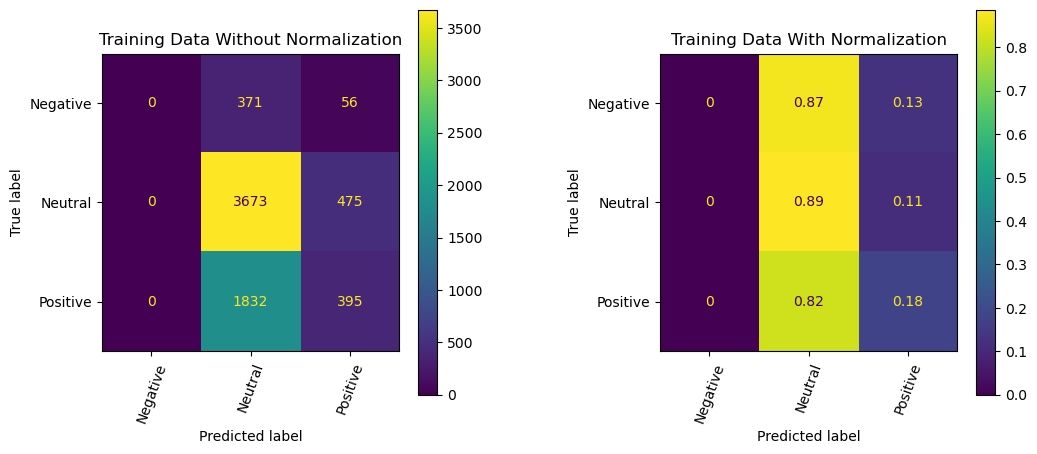

Cohen's Kappa for Training:
0.062
Matthew's Correlation Coefficient for Training:
0.077


In [26]:
show_confusion_and_report(MNBpipelineCV, X_train, y_train_enc, label_encod.classes_, 'Training')

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       142
     Neutral       0.62      0.87      0.72      1383
    Positive       0.39      0.18      0.24       743

    accuracy                           0.59      2268
   macro avg       0.34      0.35      0.32      2268
weighted avg       0.51      0.59      0.52      2268



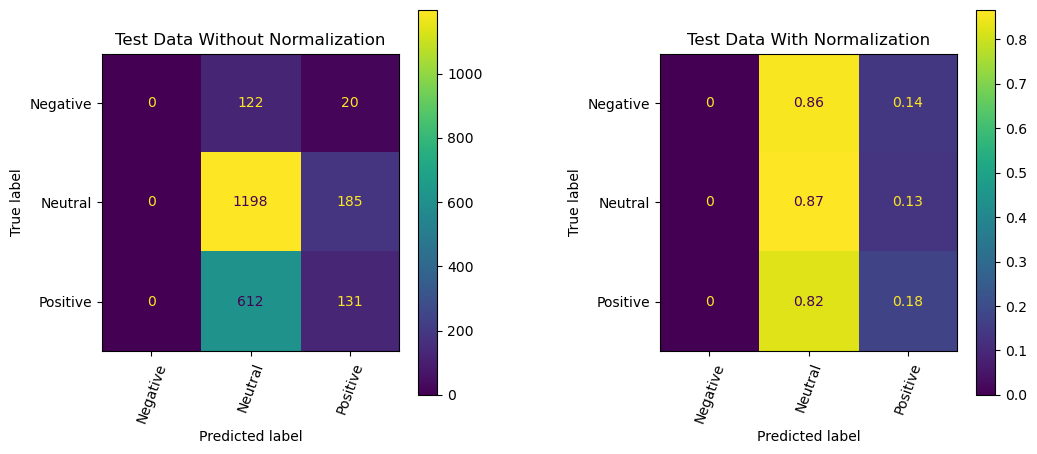

Cohen's Kappa for Test:
0.042
Matthew's Correlation Coefficient for Test:
0.05


In [27]:
show_confusion_and_report(MNBpipelineCV, X_test, y_test_enc, label_encod.classes_, 'Test')

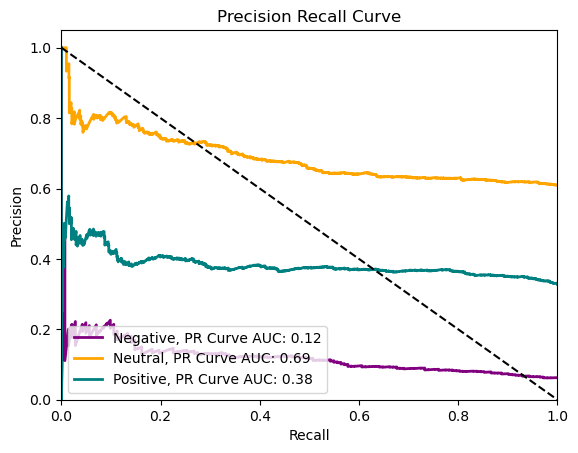

In [28]:
label.fit(y_test_enc)
y_test_multi = label.transform(y_test_enc)
y_hat_test_multi = MNBpipelineCV.predict_proba(X_test) 

trace_pr_curves(y_test_multi, y_hat_test_multi, label_encod.classes_)

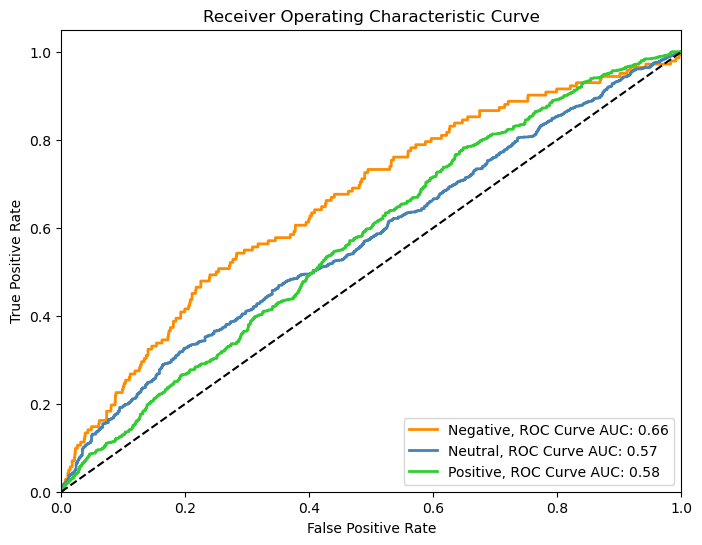

In [29]:
tracer_roc_curves(y_test_multi, y_hat_test_multi, label_encod.classes_)

## 6- Multinomial Naive Bayes with TF-IDF Vectorizer

In [30]:
y_train_enc = label_encod.fit_transform(y_train)
MNBpipelineTF = Pipeline([
    ('BOW', TfidfVectorizer(preprocessor = passing, tokenizer = passing)), 
    ('Classifier', MultinomialNB()), 
])
MNBpipelineTF.fit(X_train, y_train_enc) 

Pipeline(steps=[('BOW',
                 TfidfVectorizer(preprocessor=<function passing at 0x16beffce0>,
                                 tokenizer=<function passing at 0x16beffce0>)),
                ('Classifier', MultinomialNB())])

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       427
     Neutral       0.61      1.00      0.76      4148
    Positive       0.00      0.00      0.00      2227

    accuracy                           0.61      6802
   macro avg       0.20      0.33      0.25      6802
weighted avg       0.37      0.61      0.46      6802



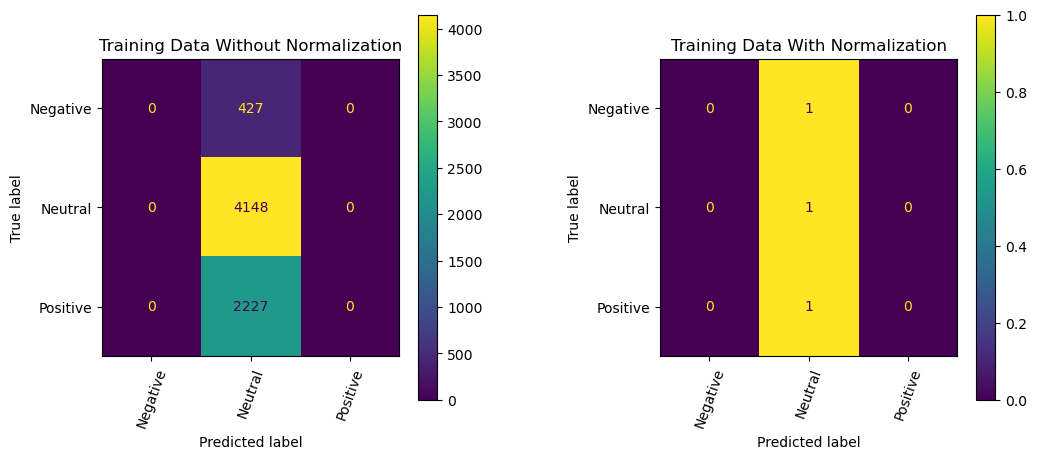

Cohen's Kappa for Training:
0.0
Matthew's Correlation Coefficient for Training:
0.0


In [31]:
show_confusion_and_report(MNBpipelineTF, X_train, y_train_enc, label_encod.classes_, 'Training')

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       142
     Neutral       0.61      1.00      0.76      1383
    Positive       0.00      0.00      0.00       743

    accuracy                           0.61      2268
   macro avg       0.20      0.33      0.25      2268
weighted avg       0.37      0.61      0.46      2268



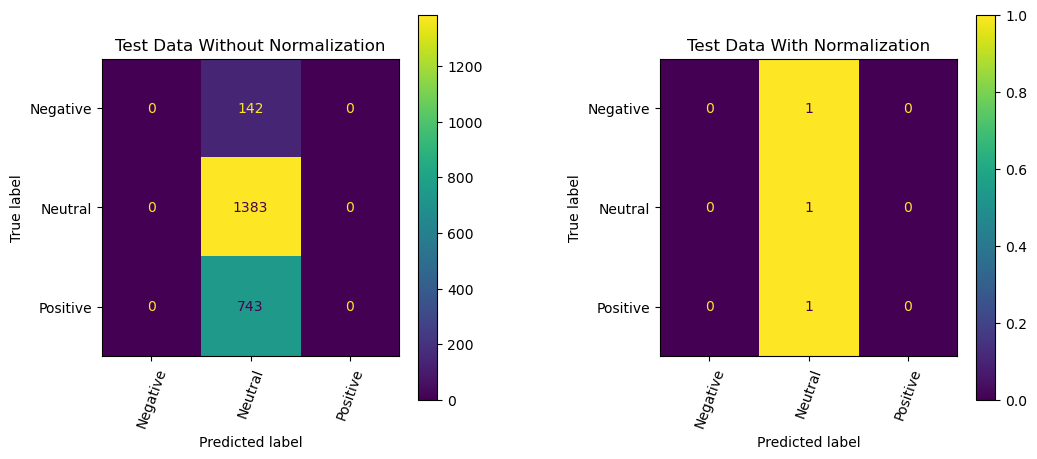

Cohen's Kappa for Test:
0.0
Matthew's Correlation Coefficient for Test:
0.0


In [32]:
show_confusion_and_report(MNBpipelineTF, X_test, y_test_enc, label_encod.classes_, 'Test')

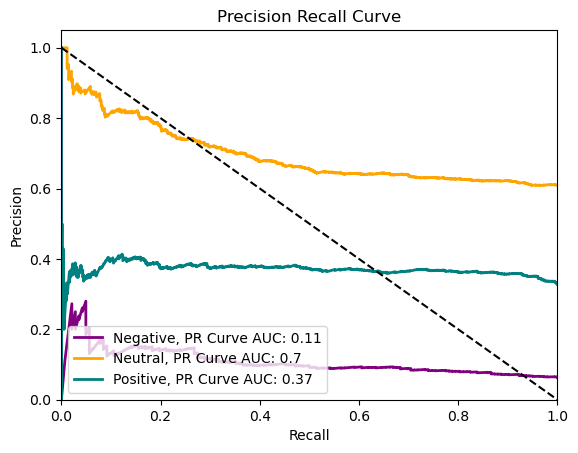

In [33]:
label.fit(y_test_enc)
y_test_multi = label.transform(y_test_enc) 
y_hat_test_multi = MNBpipelineTF.predict_proba(X_test)

trace_pr_curves(y_test_multi, y_hat_test_multi, label_encod.classes_)

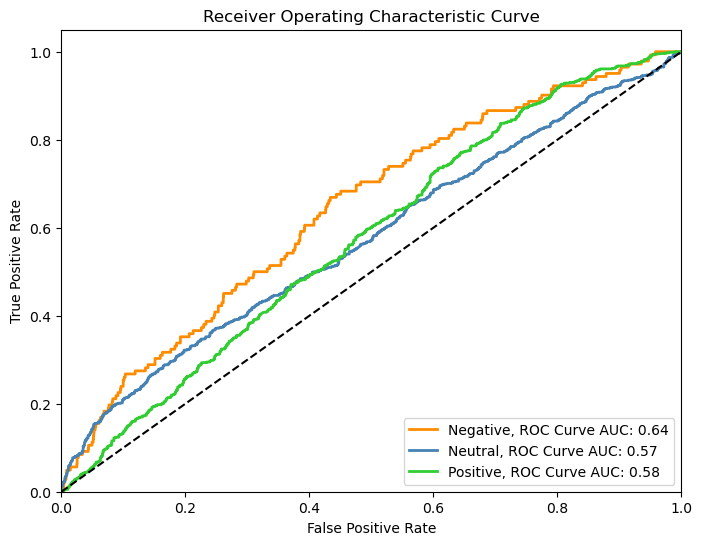

In [34]:
tracer_roc_curves(y_test_multi, y_hat_test_multi, label_encod.classes_)

## Compare our 6 models

Accuracy score:
* Logistic Regression with Count Vectorizer - 0.60
* Logistic Regression with TF-IDF Vectorizer - 0.61
* K Nearest Neighbors with Count Vectorizer - 0.57
* K Nearest Neighbors with TF-IDF Vectorizer - 0.57
* Multinomial Naive Bayes with Count Vectorizer - 0.59
* Multinomial Naive Bayes with TF-IDF Vectorizer - 0.61

Precision score:
* Logistic Regression with Count Vectorizer - 0.35
* Logistic Regression with TF-IDF Vectorizer - 0.35
* K Nearest Neighbors with Count Vectorizer - 0.40
* K Nearest Neighbors with TF-IDF Vectorizer - 0.44
* Multinomial Naive Bayes with Count Vectorizer - 0.34
* Multinomial Naive Bayes with TF-IDF Vectorizer - 0.20

Recall score:
* Logistic Regression with Count Vectorizer - 0.35
* Logistic Regression with TF-IDF Vectorizer - 0.34
* K Nearest Neighbors with Count Vectorizer - 0.38
* K Nearest Neighbors with TF-IDF Vectorizer - 0.42
* Multinomial Naive Bayes with Count Vectorizer - 0.35
* Multinomial Naive Bayes with TF-IDF Vectorizer - 0.33

F1 score:
* Logistic Regression with Count Vectorizer - 0.31
* Logistic Regression with TF-IDF Vectorizer - 0.27
* K Nearest Neighbors with Count Vectorizer - 0.38
* K Nearest Neighbors with TF-IDF Vectorizer - 0.42
* Multinomial Naive Bayes with Count Vectorizer - 0.32
* Multinomial Naive Bayes with TF-IDF Vectorizer - 0.25

Cohen's Kappa Score:
* Logistic Regression with Count Vectorizer - 0.044
* Logistic Regression with TF-IDF Vectorizer - 0.013
* K Nearest Neighbors with Count Vectorizer - 0.097
* K Nearest Neighbors with TF-IDF Vectorizer - 0.115
* Multinomial Naive Bayes with Count Vectorizer - 0.042
* Multinomial Naive Bayes with TF-IDF Vectorizer - 0.0

Matthew's Correlation Coefficient:
* Logistic Regression with Count Vectorizer - 0.064
* Logistic Regression with TF-IDF Vectorizer - 0.031
* K Nearest Neighbors with Count Vectorizer - 0.1
* K Nearest Neighbors with TF-IDF Vectorizer - 0.117
* Multinomial Naive Bayes with Count Vectorizer - 0.05
* Multinomial Naive Bayes with TF-IDF Vectorizer - 0.0